In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Github\Data Science Project\salary_data_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,job_state,same_state,age,python_yn,r_yn,spark,aws,excel
0,Data Scientist,$64K-$106K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,106,85.0,VA,0,52,0,0,0,0,0
1,Associate Business Intelligence Data Scientist,$64K-$106K (Glassdoor est.),"Blending customer advisory, customer support, ...",3.2,Carousel Industries,"Exeter, RI","Exeter, RI",1001 to 5000 employees,1992,Company - Private,...,106,85.0,RI,1,28,1,0,0,0,0
2,"Scientist, Population Genomics",$64K-$106K (Glassdoor est.),WuXi NextCODE is seeking a motivated Scientist...,2.9,Wuxi Nextcode,"Cambridge, MA","Cambridge, MA",501 to 1000 employees,2015,Company - Private,...,106,85.0,MA,1,5,1,0,0,0,1
3,Sensory Scientist,$64K-$106K (Glassdoor est.),A leading food production company in St. Louis...,3.8,NIC Infotek,"Saint Louis, MO","Tampa, FL",51 to 200 employees,2004,Company - Public,...,106,85.0,MO,0,16,0,0,0,0,1
4,Data Analyst II,$64K-$106K (Glassdoor est.),The Data Analyst II is responsible for data en...,4.2,"Insight Enterprises, Inc.","Plano, TX","Tempe, AZ",5001 to 10000 employees,1988,Company - Public,...,106,85.0,TX,0,32,0,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    


In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    705
na                 82
data engineer      71
analyst            56
mle                24
director            8
manager             8
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        794
senior    160
Name: seniority, dtype: int64

In [10]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != "anne arundel" else 'MD')
df.job_state.value_counts()

CA               232
MA                92
VA                90
NY                85
TX                47
IL                44
MD                25
DC                24
WI                24
PA                23
WA                22
NJ                21
MO                18
FL                16
AZ                15
CO                15
OR                15
MI                14
NC                13
OH                12
United States     12
CT                12
GA                11
UT                10
Remote             8
TN                 8
IN                 5
NE                 5
HI                 5
AL                 4
RI                 4
MN                 4
NH                 3
OK                 3
NM                 2
SC                 2
MS                 2
WV                 2
KY                 1
IA                 1
LA                 1
ID                 1
KS                 1
Name: job_state, dtype: int64

In [11]:
df["desc_len"] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3962
1      5358
2      3183
3      1833
4      4218
       ... 
949    2851
950    3422
951    5180
952    4299
953    4207
Name: desc_len, Length: 954, dtype: int64

In [12]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(",")) if x != "-1" else 0)

In [13]:
df.num_comp

0      0
1      0
2      0
3      0
4      3
      ..
949    0
950    0
951    0
952    2
953    0
Name: num_comp, Length: 954, dtype: int64

In [14]:
df.describe()

,Rating,Founded,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_yn,spark,aws,excel,desc_len,num_comp
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,3.908386,1754.144654,87.044025,128.156184,107.600105,0.461216,32.710692,0.751572,0.002096,0.294549,0.264151,0.402516,3632.786164,0.802935
std,0.618899,635.296609,25.007368,32.026644,27.218244,0.498755,42.866299,0.432328,0.045763,0.456079,0.441111,0.490662,1680.284722,1.257486
min,1.500000,-1.000000,47.000000,69.000000,63.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,0.000000
25%,3.500000,1951.000000,64.000000,101.000000,85.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2536.250000,0.000000
50%,3.900000,1995.000000,90.000000,121.000000,102.500000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3536.000000,0.000000
75%,4.400000,2009.000000,102.000000,156.000000,126.500000,1.000000,39.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4456.000000,2.000000
max,5.000000,2019.000000,147.000000,195.000000,171.000000,1.000000,330.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14110.000000,3.000000


In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

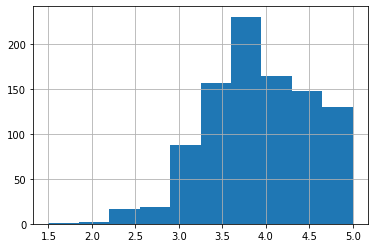

In [16]:
df.Rating.hist()

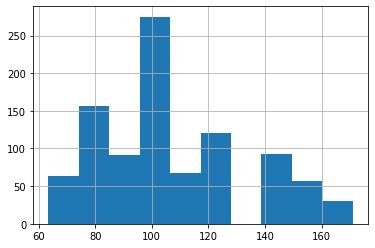

In [17]:
df.avg_salary.hist()

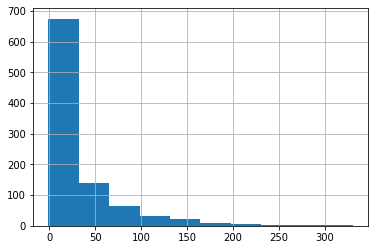

In [18]:
df.age.hist()

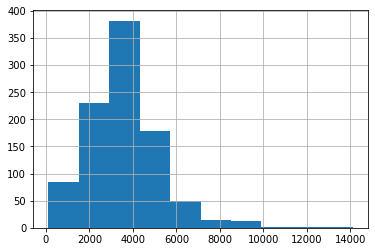

In [19]:
df.desc_len.hist()

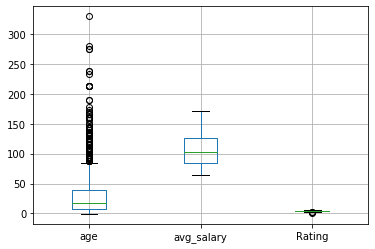

In [20]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

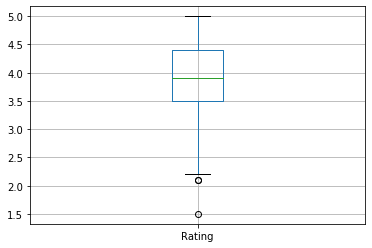

In [21]:
df.boxplot(column = 'Rating')

In [22]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.046499,-0.187058,0.199643
avg_salary,-0.046499,1.000000,0.084694,-0.042542
Rating,-0.187058,0.084694,1.000000,-0.109920
desc_len,0.199643,-0.042542,-0.109920,1.000000


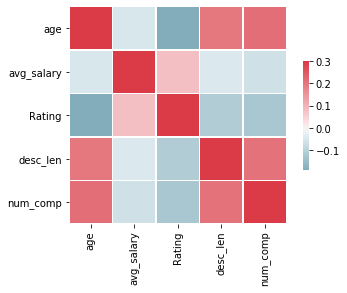

In [23]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'num_comp']].corr(), vmax = .3, center = 0, cmap = cmap, 
            square = True, linewidths = .5, cbar_kws = {'shrink': .5})

In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [25]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
    'Company Name', 'job_state', 'same_state', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'job_simp',
    'seniority']]

Graph for Location: total = 249


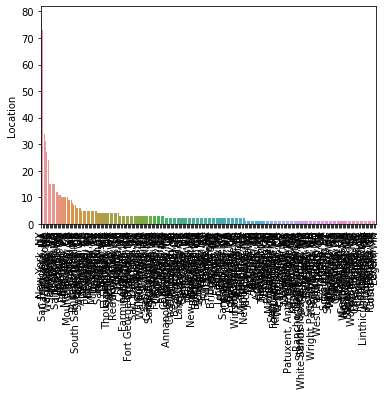

Graph for Headquarters: total = 275


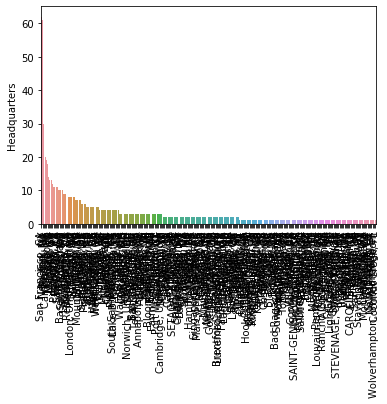

Graph for Size: total = 8


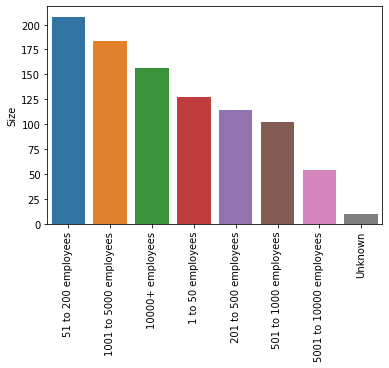

Graph for Type of ownership: total = 12


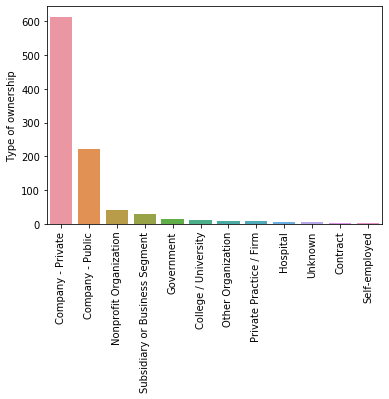

Graph for Industry: total = 68


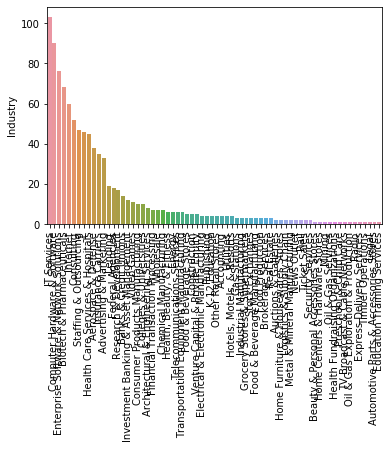

Graph for Sector: total = 25


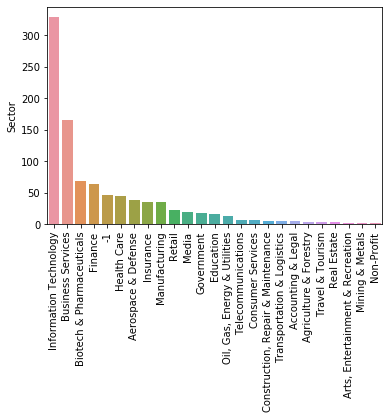

Graph for Revenue: total = 13


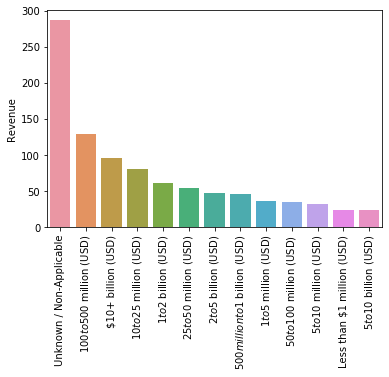

Graph for Company Name: total = 581


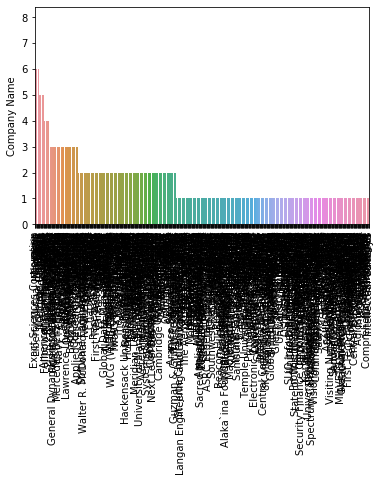

Graph for job_state: total = 43


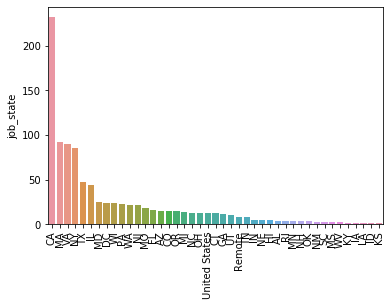

Graph for same_state: total = 2


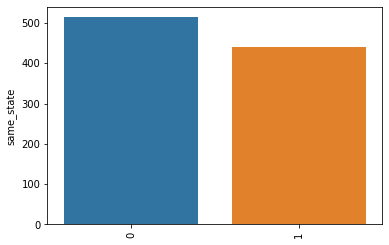

Graph for python_yn: total = 2


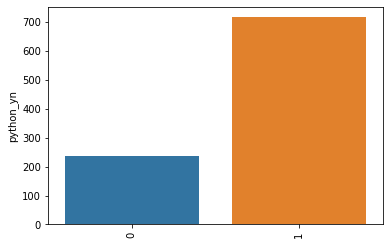

Graph for r_yn: total = 2


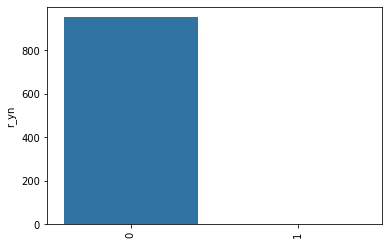

Graph for spark: total = 2


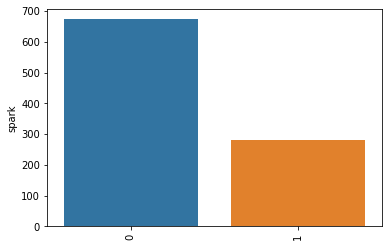

Graph for aws: total = 2


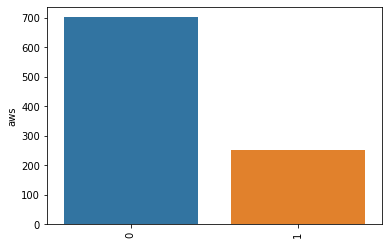

Graph for excel: total = 2


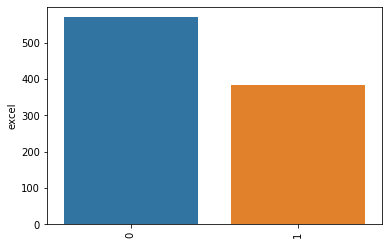

Graph for job_simp: total = 7


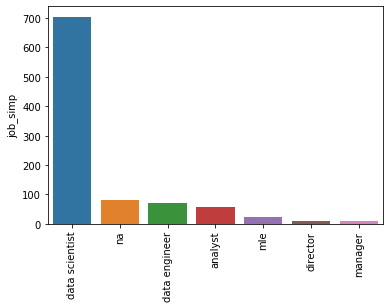

Graph for seniority: total = 2


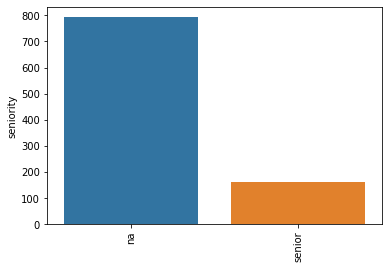

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Location: total = 20


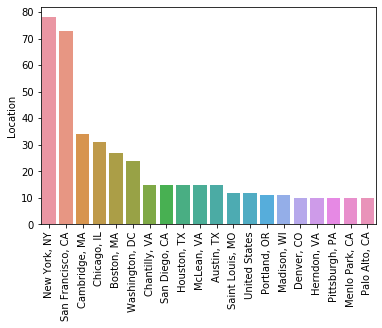

Graph for Headquarters: total = 20


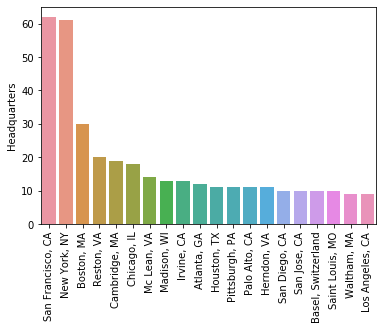

Graph for Company Name: total = 20


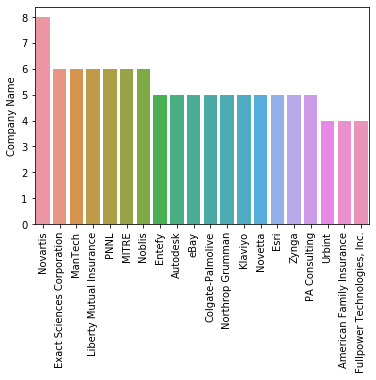

In [27]:
for i in df_cat[['Location', 'Headquarters', 'Company Name']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [29]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          93.317073
               senior     107.666667
data engineer  na         100.675439
               senior      97.285714
data scientist na         111.419275
               senior     107.224490
director       na          90.916667
               senior     101.500000
manager        na          89.500000
mle            na         101.083333
               senior      90.583333
na             na          98.614035
               senior     100.840000

In [30]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [31]:
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count'
              ).sort_values('job_state', ascending = False)

avg_salary
job_state     job_simp                  
WV            data scientist           2
WI            na                       6
              data scientist          14
              data engineer            1
              analyst                  3
WA            na                       1
              data scientist          15
              data engineer            3
              analyst                  3
VA            analyst                  3
              na                       4
              mle                      1
              director                 1
              data scientist          72
              data engineer            9
United States data scientist          12
UT            data scientist           8
              data engineer            1
              na                       1
TX            na                       5
              data scientist          32
              data engineer            4
              analyst                  6
TN            data scientist           8
SC            na                       1
              analyst                  1
Remote        data scientist           6
              data engineer            2
RI            director                 2
              data scientist           2
PA            analyst                  6
              data scientist          11
              data engineer            3
              manager                  1
              mle                      2
OR            data scientist          14
              data engineer            1
OK            data scientist           2
              analyst                  1
OH            na                       3
              mle                      2
              data scientist           5
              data engineer            1
              analyst                  1
NY            data engineer            1
              director                 1
              analyst                  3
              data scientist          74
              manager                  1
              na                       5
NM            na                       1
              data scientist           1
NJ            manager                  1
              data scientist          14
              data engineer            5
              analyst                  1
NH            director                 1
              data scientist           1
              data engineer            1
NE            data scientist           4
              analyst                  1
NC            na                       2
              data scientist           8
              mle                      1
              data engineer            2
MS            na                       2
MO            na                       3
              data scientist          11
              data engineer            3
              analyst                  1
MN            na                       1
              data scientist           3
MI            mle                      1
              data scientist          11
              data engineer            1
              analyst                  1
MD            data scientist          20
              data engineer            3
              na                       2
MA            na                      14
              mle                      4
              director                 1
              data scientist          65
              data engineer            7
              analyst                  1
LA            analyst                  1
KY            data scientist           1
KS            analyst                  1
IN            na                       1
              data scientist           2
              data engineer            1
              analyst                  1
IL            director                 1
              data engineer            6
              data scientist          33
              mle                      2
            

In [32]:
pd.pivot_table(df[df.job_simp == "data scientist"], index = 'job_state', values = 'avg_salary'
              ).sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
OK,140.500000
KY,127.500000
NH,126.000000
NE,123.625000
United States,122.250000
TX,119.421875
Remote,118.750000
MA,114.923077
MO,114.681818


In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'same_state',
       'age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [34]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'python_yn', 'r_yn', 'spark',
                'aws', 'excel', 'Type of ownership', 'avg_salary']]

In [35]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = "avg_salary").sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
4.3     121.305556
2.6     117.357143
4.8     116.500000
2.2     114.250000
3.2     112.986486
5.0     111.541667
2.1     111.500000
4.7     111.416667
3.7     110.490196
4.4     109.814815
4.0     108.915254
4.2     108.647059
4.1     108.324074
4.5     108.072917
3.0     106.200000
4.6     106.027027
3.8     105.916667
4.9     105.642857
3.6     104.392857
3.9     104.307018
2.3     104.100000
2.7     103.857143
3.4     103.525424
2.8     103.100000
3.5     102.546875
2.5     101.583333
3.3     101.560606
2.9     100.166667
3.1      99.055556
1.5      98.500000
2.4      77.000000
Industry
                                         avg_salary
Industry                                           
Home Centers & Hardware Stores           171.000000
Health Fundraising Organizations         155.000000
Oil & Gas Exploration & Production       148.000000
TV Broadcast & Cable Networks            145.500000
Auctions & Galleries                     137.

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [37]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),13,49
$1 to $5 million (USD),4,32
$10 to $25 million (USD),21,60
$10+ billion (USD),25,71
$100 to $500 million (USD),44,85
$2 to $5 billion (USD),13,35
$25 to $50 million (USD),13,41
$5 to $10 billion (USD),4,20
$5 to $10 million (USD),9,23
